##  使用python的字典dict构建数据集，然后再将其转化成DataFrame格式

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
import seaborn as sns
#myfont=FontProperties(fname=r'C:\Windows\Fonts\SIMYOU.ttf',size=8)   #seaborn可以显示中文
#sns.set(font=myfont.get_name())


In [2]:
rowdata={'电影名称':['无问西东','后来的我们','前任3','红海行动','唐人街探案','战狼2','新电影'],
        '打斗镜头':[1,5,12,108,112,115,90],
        '接吻镜头':[101,89,97,5,9,8,24],
        '电影类型':['爱情片','爱情片','爱情片','动作片','动作片','动作片','？']}
movie_data= pd.DataFrame(rowdata)
movie_data

,电影名称,打斗镜头,接吻镜头,电影类型
0,无问西东,1,101,爱情片
1,后来的我们,5,89,爱情片
2,前任3,12,97,爱情片
3,红海行动,108,5,动作片
4,唐人街探案,112,9,动作片
5,战狼2,115,8,动作片
6,新电影,90,24,？


In [3]:
x1

NameError: name 'x1' is not defined

## 图形显示

<IPython.core.display.Javascript object>


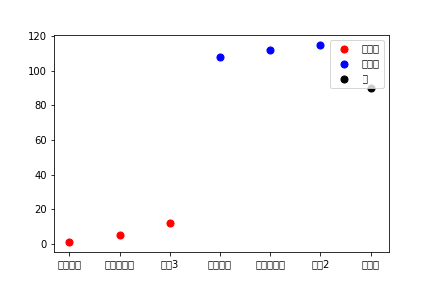

In [4]:
%matplotlib notebook
x1 = movie_data.iloc[0:3,0]
y1 = movie_data.iloc[0:3,1]
x2 = movie_data.iloc[3:6,0]
y2 = movie_data.iloc[3:6,1]

scatter1 = plt.scatter(x1,y1,s=200,marker='.',c='r')
scatter2 = plt.scatter(x2,y2,s=200,marker='.',c='b')

scatter3 = plt.scatter(movie_data.iloc[6,0],movie_data.iloc[6,1],s=200,marker='.',c='black')

plt.legend(handles = [scatter1,scatter2,scatter3],labels=['爱情片','动作片','？'])

# Colors = []
# for i in range(movie_data.shape[0]):
#     m =movie_data.iloc[i,-1]
#     if m=='爱情片':
#         Colors.append('blue')
#     if m=='动作片':
#         Colors.append('red')
#     if m=='？':
#         Colors.append('y')    
#plt.rcParams['font.sans-serif']=['Simhei']   #图中字体设置为黑体
# pl=plt.figure(figsize=(8,6))
# plt.scatter(movie_data.iloc[:,0],movie_data.iloc[:,1],s=1000,marker='.',c=Colors)
# plt.xlabel('打斗镜头')
# plt.ylabel('接吻镜头')
#plt.text(['爱情片','动作片','新电影'])
#plt.scatter(new_data.iloc[:,0],new_data.iloc[:,1],s=1000,marker='.',c='gray'
#sns.swarmplot(x="打斗镜头",y="接吻镜头",hue="电影类型",data=movie_data)
     

## 计算已知类别数据集中的点与当前点之间的距离

In [7]:
new_data = [90,24]
dist = list((((movie_data.iloc[:6,0:2]-new_data)**2).sum(1))**0.5)
dist

ValueError: Cannot broadcast operands together.

## 将距离升序排列，然后选取距离最小的k个点

In [8]:
dist_l = pd.DataFrame({'dist': dist, 'labels': (movie_data.iloc[:6, 3])})
dr = dist_l.sort_values(by = 'dist')[: 4]
dr

NameError: name 'dist' is not defined

##  确定前k个点所在类别的出现频率

In [9]:
re = dr.loc[:,'labels'].value_counts()
re

NameError: name 'dr' is not defined

In [71]:
re.index

Index(['动作片', '爱情片'], dtype='object')

## 选择频率最高的类别作为当前点的预测类别

In [72]:
result = []
result.append(re.index[0])
result

['动作片']

## 封装函数

In [74]:
def classify0(inX,dataSet,k):
    result = []
    dist = list((((dataSet.iloc[:6,0:2]-inX)**2).sum(1))**0.5)
    dist_l = pd.DataFrame({'dist': dist, 'labels': (dataSet.iloc[:6, 3])})
    dr = dist_l.sort_values(by = 'dist')[: k]
    re = dr.loc[:,'labels'].value_counts()
    result.append(re.index[0])
    return result   

In [75]:
inX = [24,90]
dataSet = movie_data
k = 5
result = classify0(inX,dataSet,k)
result

['爱情片']

In [ ]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]#numpy函数shape[0]返回dataSet的行数
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet#在列向量方向上重复inX共1次(横向),行向量方向上重复inX共dataSetSize次(纵向)
    sqDiffMat = diffMat**2#二维特征相减后平方
    sqDistances = sqDiffMat.sum(axis=1)#sum()所有元素相加,sum(0)列相加,sum(1)行相加
    distances = sqDistances**0.5#开方,计算出距离
    sortedDistIndices = distances.argsort()#返回distances中元素从小到大排序后的索引值
    classCount = {}#定一个记录类别次数的字典
    for i in range(k):
        voteIlabel = labels[sortedDistIndices[i]]#取出前k个元素的类别
        #dict.get(key,default=None),字典的get()方法,返回指定键的值,如果值不在字典中返回默认值。
        #计算类别次数
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    #key=operator.itemgetter(1)根据字典的值进行排序
    #key=operator.itemgetter(0)根据字典的键进行排序
    #reverse降序排序字典
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    print(sortedClassCount)
    #返回次数最多的类别,即所要分类的类别
    return sortedClassCount[0][0]

In [ ]:
def classify0(inx, dataset, labels, k):
    # 计算距离
    dist = np.sum((inx - dataset)**2, axis=1)**0.5
    # k个最近的标签
    k_labels = [labels[index] for index in dist.argsort()[0 : k]]
    # 出现次数最多的标签即为最终类别
    label = collections.Counter(k_labels).most_common(1)[0][0]
    return label